<a href="https://colab.research.google.com/github/xxoznge/Bigdata_Analyst_Certificate_Korean/blob/main/2%EC%9C%A0%ED%98%95_DataManim_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/youtube/youtube.csv",index_col=0)

In [21]:
# 인기동영상 제작 횟수가 많은 채널 상위 10개명을 출력하라 (날짜기준, 중복포함)

result = list(df.loc[df.channelId.isin(df.channelId.value_counts().head(10).index)].channelTitle.unique())
print(result)

['장삐쭈', '총몇명', '파뿌리', '짤툰', '런닝맨 - 스브스 공식 채널', '엠뚜루마뚜루 : MBC 공식 종합 채널', 'SPOTV', '채널 십오야', '이과장', 'BANGTANTV']


In [22]:
# 논란으로 인기동영상이 된 케이스를 확인하고 싶다.
# dislikes수가 like 수보다 높은 동영상을 제작한 채널을 모두 출력하라

result = list(df.loc[df.dislikes > df.likes].channelTitle.unique())
print(result)

['핫도그TV', 'ASMR 애정TV', '하얀트리HayanTree', '양팡 YangPang', '철구형 (CHULTUBE)', '왜냐맨하우스', '(MUTUBE)와꾸대장봉준', '오메킴TV', '육지담', 'MapleStory_KR', 'ROAD FIGHTING CHAMPIONSHIP', '사나이 김기훈', '나혼자산다 STUDIO', 'Gen.G esports']


In [23]:
# 채널명을 바꾼 케이스가 있는지 확인하고 싶다.
# channelId의 경우 고유값이므로 이를 통해 채널명을 한번이라도 바꾼 채널의 갯수를 구하여라

change = df[['channelTitle','channelId']].drop_duplicates().channelId.value_counts()
result = change[change>=1]
print(result)

channelId
UCtQYhzJWFai1y30UIA3uwYQ    3
UC98TOxKQk4aLcx0EjIK0LkQ    3
UC4nEQI74rZkFKlUSwi0ur4A    2
UCn64fSqF2l4rkkjtQUpku2A    2
UCjO3ji06DxmTM1RrzLVwmkA    2
                           ..
UCuZu8NrpBG4WPXRi-hPBl-A    1
UCDrAR1OWC2MD4s0JLetN0MA    1
UCx2MVBsdTJ_sv0LiUpSQU2Q    1
UCu2R3TCLSxYV8pRyBGNOh2g    1
UCRCK5FCJtomQT3b88jXI_DA    1
Name: count, Length: 1770, dtype: int64


In [25]:
# 일요일에 인기있었던 영상들중 가장많은 영상 종류(categoryId)는 무엇인가?

df['trending_date2'] = pd.to_datetime(df['trending_date2'])
result = df.loc[df['trending_date2'].dt.day_name() == 'Sunday'].categoryId.value_counts().index[0]
print(result)

24


In [28]:
# 각 요일별 인기 영상들의 categoryId는 각각 몇개 씩인지 하나의 데이터 프레임으로 표현하라

group = df.groupby([df['trending_date2'].dt.day_name(),'categoryId'], as_index=False).size()
result = group.pivot(index='categoryId', columns='trending_date2')
display(result)

size                                                  
trending_date2 Friday Monday Saturday Sunday Thursday Tuesday Wednesday
categoryId                                                             
1                 243    263      255    274      246     257       234
2                 120    105      119     99      128     119       129
10                833    837      776    830      890     894       917
15                187    215      198    217      207     208       207
17                633    668      592    636      682     708       706
19                 90     92       87     91       92      89        85
20                283    298      296    289      282     285       291
22               1288   1373     1289   1337     1341    1375      1333
23                568    594      570    556      560     569       566
24               2976   3148     3066   3096     2954    3084      3090
25                444    453      422    437      470     452       468
26                369    378      364    363      375     394       385
27                183    205      183    199      194     194       212
28                171    160      173    167      166     161       165
29                 12     10       10      9       13      11        12

In [30]:
# 댓글의 수로 (comment_count) 영상 반응에 대한 판단을 할 수 있다.
# viewcount대비 댓글수가 가장 높은 영상을 확인하라 (view_count값이 0인 경우는 제외한다)

target = df.loc[df.view_count != 0]
t = target.copy()
t['ratio'] = (target['comment_count']/target['view_count']).dropna()
result = t.sort_values(by='ratio', ascending=False).iloc[0].title
print(result)

60분 동안 댓글이 달리지 않으면, 영상이 삭제됩니다. (챌린지)


Join the BTS #PermissiontoDance Challenge only on YouTube #Shorts


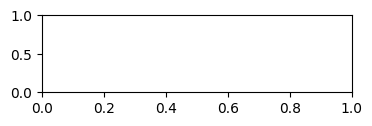

In [36]:
# 댓글의 수로 (comment_count) 영상 반응에 대한 판단을 할 수 있다.
# viewcount대비 댓글수가 가장 낮은 영상을 확인하라 (view_counts, ratio값이 0인경우는 제외한다.)

ratio = (df['comment_count']/df['view_count']).dropna().sort_values()
result = df.iloc[ratio[ratio!=0].index[0]].title
print(result)

In [39]:
# like 대비 dislike의 수가 가장 적은 영상은 무엇인가? (like, dislike 값이 0인경우는 제외한다)

target = df.loc[(df.dislikes!=0)&(df.likes!=0)]
num = (target['dislikes']/target['likes']).sort_values().index[0]
result = df.iloc[num].title
print(result)

[줌터뷰] *최초공개* 사부작즈🐰🐶의 비공식 이름은 아이라인즈? 꿀조합 티키타카 가득한 NCT 127 도영&정우의 줌터뷰


In [42]:
# 가장많은 트렌드 영상을 제작한 채널의 이름은 무엇인가? (날짜기준, 중복포함)

result = df.loc[df['channelId'] == df['channelId'].value_counts().index[0]].channelTitle.unique()
print(result)

['짤툰']


In [47]:
# 20회(20일)이상 인기동영상 리스트에 포함된 동영상의 숫자는?

result = (df[['title','channelId']].value_counts() >= 20).sum()
print(result)

40


In [72]:
import pandas as pd

channel =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/youtube/channelInfo.csv')
video =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/youtube/videoInfo.csv')

In [75]:
# 각 데이터의 ‘ct’컬럼을 시간으로 인식할수 있게 datatype을 변경하고
# video 데이터의 videoname의 각 value 마다 몇개의 데이터씩 가지고 있는지 확인하라

video['ct'] = pd.to_datetime(video['ct'])
result = video.videoname.value_counts()
print(result)

videoname
 공범 EP1    3492
 공범 EP2    3204
 공범 EP3    2568
 공범 EP4    2280
 공범 EP5    1562
 공범 EP6    1274
 공범 EP7     555
 공범 EP8     266
Name: count, dtype: int64


In [76]:
# 수집된 각 video의 가장 최신화 된 날짜의 viewcount값을 출력하라

result = video.sort_values(['videoname', 'ct']).drop_duplicates('videoname',keep='last')[['viewcnt','videoname','ct']].reset_index(drop=True)
print(result)

   viewcnt videoname                  ct
0  3180532    공범 EP1 2021-11-01 15:30:03
1  2199328    공범 EP2 2021-11-01 15:30:03
2  1671294    공범 EP3 2021-11-01 15:30:03
3  1818493    공범 EP4 2021-11-01 15:30:03
4  1503435    공범 EP5 2021-11-01 15:30:04
5  1750222    공범 EP6 2021-11-01 15:30:04
6  1630200    공범 EP7 2021-11-01 15:30:05
7  1289088    공범 EP8 2021-11-01 15:30:05


In [77]:
# Channel 데이터중 2021-10-03일 이후 각 채널의 처음 기록 됐던 구독자 수(subcnt)를 출력하라

channel.ct = pd.to_datetime(channel.ct)
target = channel[channel.ct >= pd.to_datetime('2021-10-03')].sort_values(['channelname','ct']).drop_duplicates('channelname')
result = target[['channelname','subcnt']]
print(result)

          channelname   subcnt
1276    Balming Tiger    54300
1155    곽토리 kwak tori   471000
901        김농밀의 농밀한 삶     7520
12                꽈뚜룹  1330000
393            논리왕 전기   922000
1028      릴펄 Lilpearl    10100
139             야전삽짱재   257000
520   와글와글 WagleWagle    55000
647               조나단   215000
266        츄정ChuJeong   322000
774           형사!탐정되다    14900


In [78]:
# 각 채널의 2021-10-03 03:00:00 ~ 2021-11-01 15:00:00 까지
# 구독자수 (subcnt) 의 증가량을 구하여라

start = channel.loc[channel.ct.dt.strftime('%Y-%m-%d %H') == '2021-10-03 03']
end = channel.loc[channel.ct.dt.strftime('%Y-%m-%d %H') == '2021-11-01 15']

start_df = start[['channelname', 'subcnt']].reset_index(drop=True)
end_df = end[['channelname','subcnt']].reset_index(drop=True)

start_df.columns = ['channelname','start_sub']
end_df.columns = ['channelname', 'end_sub']

tt = pd.merge(start_df, end_df)
tt['del'] = tt['end_sub'] - tt['start_sub']
result = tt[['channelname', 'del']]
print(result)

        channelname    del
0               꽈뚜룹  70000
1             야전삽짱재  11000
2        츄정ChuJeong   1000
3            논리왕 전기 -11000
4   와글와글 WagleWagle      0
5               조나단  12000
6           형사!탐정되다  10300
7        김농밀의 농밀한 삶   1540
8       릴펄 Lilpearl  11000
9     곽토리 kwak tori  -2000
10    Balming Tiger   2500


In [79]:
# 각 에피소드의 시작날짜(년-월-일)를 에피소드 이름과 묶어 데이터 프레임으로 만들고 출력하라

start_date = video.sort_values(['videoname','ct']).drop_duplicates('videoname')[['videoname','ct']]
start_date['date'] = start_date.ct.dt.date
result = start_date[['date','videoname']]
display(result)

,date,videoname
10,2021-10-07,공범 EP1
3496,2021-10-09,공범 EP2
6696,2021-10-14,공범 EP3
9264,2021-10-16,공범 EP4
11544,2021-10-21,공범 EP5
13661,2021-10-23,공범 EP6
13106,2021-10-28,공범 EP7
14935,2021-10-30,공범 EP8


In [80]:
# “공범” 컨텐츠의 경우 19:00시에 공개 되는것으로 알려져있다.
# 공개된 날의 21시의 viewcnt, ct, videoname 으로 구성된 데이터 프레임을
# viewcnt를 내림차순으로 정렬하여 출력하라

video['time'] = video.ct.dt.hour
result = video.loc[video['time'] == 21]\
                   .sort_values(['videoname','ct'])\
                   .drop_duplicates('videoname')\
                   .sort_values('viewcnt', ascending=False)[['videoname','ct','viewcnt']]\
                   .reset_index(drop=True)
display(result)

,videoname,ct,viewcnt
0,공범 EP8,2021-10-30 21:00:08,264029
1,공범 EP7,2021-10-28 21:00:04,252032
2,공범 EP4,2021-10-16 21:00:04,217674
3,공범 EP6,2021-10-23 21:00:06,213899
4,공범 EP5,2021-10-21 21:00:04,201179
5,공범 EP2,2021-10-09 21:00:03,148144
6,공범 EP3,2021-10-14 21:00:04,147183
7,공범 EP1,2021-10-07 21:00:03,117340


In [81]:
# video 정보의 가장 최근 데이터들에서 각 에피소드의 싫어요/좋아요 비율을 ratio 컬럼으로 만들고
# videoname, ratio로 구성된 데이터 프레임을 ratio를 오름차순으로 정렬하라

target = video.sort_values(['ct']).drop_duplicates('videoname',keep='last')
video['ratio'] = target['dislikecnt']/target['likecnt']
result = video.sort_values('ratio')[['videoname','ratio']].reset_index(drop=True)
print(result)

      videoname     ratio
0        공범 EP7  0.013636
1        공범 EP6  0.015881
2        공범 EP4  0.017971
3        공범 EP5  0.021128
4        공범 EP3  0.022360
...         ...       ...
15196    공범 EP8       NaN
15197    공범 EP8       NaN
15198    공범 EP8       NaN
15199    공범 EP8       NaN
15200    공범 EP8       NaN

[15201 rows x 2 columns]


In [82]:
# 2021-11-01 00:00:00 ~ 15:00:00까지
# 각 에피소드별 viewcnt의 증가량을 데이터 프레임으로 만드시오

start = pd.to_datetime("2021-11-01 00:00:00")
end = pd.to_datetime("2021-11-01 15:00:00")

target = video.loc[(video['ct'] >= start)&(video['ct']<=end)].reset_index(drop=True)

def check(x):
  result = max(x) - min(x)
  return result

result = target[['videoname', 'viewcnt']].groupby("videoname").agg(check)
print(result)

           viewcnt
videoname         
 공범 EP1      13298
 공범 EP2      10300
 공범 EP3       9927
 공범 EP4       9824
 공범 EP5      10824
 공범 EP6      14141
 공범 EP7      26949
 공범 EP8      89147


In [83]:
# video 데이터 중에서 중복되는 데이터가 존재한다.
# 중복되는 각 데이터의 시간대와 videoname 을 구하여라

result = video[video.index.isin(set(video.index)-set(video.drop_duplicates().index))]
result = result[['videoname','ct']]
display(result)

,videoname,ct
722,공범 EP1,2021-10-13 09:41:37
3927,공범 EP2,2021-10-13 09:41:37


In [85]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/worldcup/worldcupgoals.csv')

In [88]:
# 주어진 전체 기간의 각 나라별 골득점수 상위 5개 국가와 그 득점수를 데이터프레임형태로  출력하라

result = df.groupby('Country').sum().sort_values('Goals', ascending=False).head(5)
display(result)

,Player,Goals,Years
Country,,,
Brazil,RonaldoPeleAdemirJairzinhoVavaLeonidasRivaldoC...,228,1998-2002-20061958-1962-1966-197019501966-1970...
Germany,Miroslav KloseGerd MullerJurgen KlinsmannThoma...,226,2002-2006-2010-20141970-19741990-1994-19982010...
Argentina,Gabriel BatistutaDiego MaradonaGuillermo Stabi...,135,1994-1998-20021982-1986-1990-199419301974-1978...
Italy,Roberto BaggioPaolo RossiChristian VieriSalvat...,123,1990-1994-19981978-19821998-2002199019381982-1...
France,Just FontaineThierry HenryMichel PlatiniZinedi...,115,19581998-2002-2006-20101978-1982-19861998-2002...


In [109]:
# 주어진 전체기간동안 골득점을 한 선수가 가장 많은 나라 상위 5개 국가와
# 그 선수 숫자를 데이터 프레임 형식으로  출력하라

result = df.groupby('Country').size().sort_values(ascending=False).head(5)
display(result)

Country
Brazil       81
Germany      78
Italy        60
Argentina    59
France       58
dtype: int64

In [110]:
# Years 컬럼은 년도-년도 형식으로 구성되어있고, 각 년도는 4자리 숫자이다.
# 년도 표기가 4자리 숫자로 안된 케이스가 존재한다. 해당 건은 몇건인지 출력하라

df['YearLst'] = df.Years.str.split('-')

def check(x):
  for value in x:
    if len(value) != 4:
      return False
    return True

df['check'] = df['yearLst'].apply(check)
result = len(df[df.check==False])
print(result)

45


In [113]:
# **Q3에서 발생한 예외 케이스를 제외한 데이터프레임을 df2라고 정의하고
# 데이터의 행의 숫자를 출력하라 (아래 문제부터는 df2로 풀이하겠습니다) **

df2 = df[df.check==True].reset_index(drop=True)
print(df2.shape[0])

1250


In [114]:
# 월드컵 출전횟수를 나타내는 ‘LenCup’ 컬럼을 추가하고 4회 출전한 선수의 숫자를 구하여라

df2['LenCup'] = df2['YearLst'].str.len()
result = df2['LenCup'].value_counts()[4]
print(result)

16


In [115]:
# Yugoslavia 국가의 월드컵 출전횟수가 2회인 선수들의 숫자를 구하여라

result = len(df2[(df2.LenCup == 2)&(df2.Country=='Yugoslavia')])
print(result)

7


In [116]:
# 2002년도에 출전한 전체 선수는 몇명인가?

result = len(df2[df2.Years.str.contains('2002')])
print(result)

156


In [118]:
# 이름에 ‘carlos’ 단어가 들어가는 선수의 숫자는 몇 명인가? (대, 소문자 구분 x)

result = len(df2[df2.Player.str.lower().str.contains('carlos')])
print(result)

13


In [119]:
# 월드컵 출전 횟수가 1회뿐인 선수들 중에서 가장 많은 득점을 올렸던 선수는 누구인가?

result = df2[df2.LenCup == 1].sort_values('Goals', ascending=False).Player.values[0]
print(result)

Just Fontaine


In [121]:
# 월드컵 출전횟수가 1회 뿐인 선수들이 가장 많은 국가는 어디인가?

result = df2[df2.LenCup==1].Country.value_counts().index[0]
print(result)

Brazil


In [32]:
import pandas as pd
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/bicycle/seoul_bi.csv')

In [5]:
# 대여일자별 데이터의 수를 데이터프레임으로 출력하고, 가장 많은 데이터가 있는 날짜를 출력하라

result = df['대여일자'].value_counts().sort_index().to_frame(name='count')
answer = result[result['count'] == result['count'].max()].index[0]
print(answer)
display(result)

2021-06-04


,count
대여일자,
2021-06-01,48081
2021-06-02,56100
2021-06-03,18985
2021-06-04,56788
2021-06-05,52730
2021-06-06,47787
2021-06-07,52623
2021-06-08,55623
2021-06-09,54507


In [7]:
# 각 일자의 요일을 표기하고 (‘Monday’ ~’Sunday’) ‘day_name’컬럼을 추가하고
# 이를 이용하여 각 요일별 이용 횟수의 총합을 데이터 프레임으로  출력하라

df['대여일자'] = pd.to_datetime(df['대여일자'])
df['day_name'] = df['대여일자'].dt.day_name()
result = df.day_name.value_counts().to_frame()
print(result)

            count
day_name         
Wednesday  110607
Friday     108877
Monday     107568
Tuesday    103704
Saturday   101299
Sunday      90918
Thursday    55977


In [9]:
# 각 요일별 가장 많이 이용한 대여소의 이용횟수와 대여소 번호를 데이터 프레임으로 출력하라

result = df.groupby(['day_name', '대여소번호']).size().to_frame('size').sort_values(['day_name','size'], ascending=False).reset_index()
result = result.drop_duplicates('day_name', keep='first').reset_index(drop=True)
print(result)

    day_name  대여소번호  size
0  Wednesday    502   282
1    Tuesday    502   267
2   Thursday   2715   137
3     Sunday    502   372
4   Saturday    502   378
5     Monday    502   242
6     Friday    502   277


In [10]:
# 나이대별 대여구분 코드의 (일일권/전체횟수) 비율을 구한 후
# 가장 높은 비율을 가지는 나이대를 확인하라.
# 일일권의 경우 일일권 과 일일권(비회원)을 모두 포함하라

daily = df[df.대여구분코드.isin(['일일권','일일권(비회원)'])].연령대코드.value_counts().sort_index()
total = df.연령대코드.value_counts().sort_index()
ratio = (daily/total).sort_values(ascending=False)
print(ratio)
print('max',ratio.index[0])

연령대코드
~10대    0.312525
20대     0.239913
30대     0.166702
40대     0.110585
50대     0.065414
70대~    0.048962
60대     0.042462
Name: count, dtype: float64
max ~10대


In [12]:
# 연령대별 평균 이동거리를 구하여라

result = df[['연령대코드','이동거리']].groupby(['연령대코드']).mean()
print(result)

              이동거리
연령대코드             
20대    3211.890552
30대    3341.443859
40대    3514.857416
50대    3593.668100
60대    3538.145737
70대~   3085.039641
~10대   2634.426279


In [16]:
# 연령대 코드가 20대인 데이터를 추출하고,
# 이동거리값이 추출한 데이터의 이동거리값의 평균 이상인 데이터를 추출한다.
# 최종 추출된 데이터를 대여일자, 대여소 번호 순서로
# 내림차순 정렬 후 1행부터 200행까지의 탄소량의 평균을 소숫점 3째 자리까지 구하여라

tw = df[df['연령대코드']=='20대'].reset_index(drop=True)
tw_mean = tw[tw.이동거리 >= tw.이동거리.mean()].reset_index(drop=True)
tw_mean['탄소량'] = tw_mean['탄소량'].astype('float')
target = tw_mean.sort_values(['대여일자','대여소번호'],ascending=False).reset_index(drop=True).iloc[:200].탄소량
result = round(target.sum()/len(target),3)
print(result)

1.613


In [19]:
# 6월 7일 ~10대의 “이용건수”의 중앙값은?

df['대여일자'] = pd.to_datetime(df['대여일자'])
result = df[(df.대여일자=='2021-06-07')&(df.연령대코드 == '~10대')].이용건수.median()
print(result)

1.0


In [23]:
# 평일 (월~금) 출근 시간대(오전 6,7,8시)의 대여소별 이용 횟수를 구해서
# 데이터 프레임 형태로 표현한 후 각 대여시간별 이용 횟수의 상위 3개 대여소와 이용횟수를 출력하라

target = df[(df.day_name.isin(['Tuesday', 'Wednesday', 'Thursday', 'Friday','Monday']))&(df.대여시간.isin([6,7,8]))]
result = target.groupby(['대여시간','대여소번호']).size().to_frame('이용횟수')
result = result.sort_values(['대여시간','이용횟수'], ascending=False).groupby('대여시간').head(3)
print(result)

            이용횟수
대여시간 대여소번호      
8    2701    119
     646     115
     1152     92
7    259     104
     230      77
     726      77
6    2744     45
     1125     40
     1028     36


In [24]:
# 이동거리의 평균 이상의 이동거리 값을 가지는 데이터를 추출하여
# 추출데이터의 이동거리의 표본표준편차 값을 구하여라

result = df[df.이동거리 >= df.이동거리.mean()].reset_index(drop=True).이동거리.std()
print(result)

5092.139707505356


In [33]:
# 남성(‘M’ or ‘m’)과 여성(‘F’ or ‘f’)의 이동거리값의 평균값을 구하여라

df['sex'] = df['성별'].map(lambda x: '남' if x in ['M','m'] else '여')
result = df[['sex','이동거리']].groupby('sex').mean()
display(result)

,이동거리
sex,
남,3209.110871
여,3468.575025


In [34]:
import pandas as pd
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/happy2/happiness.csv',encoding='utf-8')

In [36]:
# 각 년도의 행복랭킹 10위를 차지한 나라의 행복점수의 평균을 구하여라

result = df[df.행복랭킹 ==  10]['점수'].mean()
print(result)

7.259


In [39]:
# 각 년도의 행복랭킹 50위이내의 나라들의 각각의 행복점수 평균을 데이터프레임으로 표시하라

result = df[df.행복랭킹 <= 50][['년도','점수']].groupby('년도').mean()
print(result)

           점수
년도           
2018  6.64678
2019  6.67002


In [40]:
# 2018년도 데이터들만 추출하여 행복점수와 부패에 대한 인식에 대한 상관계수를 구하여라

result = df[df.년도 == 2018][['점수','부패에 대한인식']].corr().iloc[0,1]
print(result)

0.40529152271510027


In [42]:
# 2018년도와 2019년도의 행복랭킹이 변화하지 않은 나라명의 수를 구하여라

result = len(df[['행복랭킹','나라명']]) - len(df[['행복랭킹','나라명']].drop_duplicates())
print(result)

15


In [50]:
# 2019년도 데이터들만 추출하여 각 변수간 상관계수를 구하고
# 내림차순으로 정렬한 후 상위 5개를 데이터 프레임으로  출력하라.
# 컬럼명은 v1,v2,corr으로 표시하라

target = df[df.년도 == 2019].select_dtypes(include=['float64','int64'])
target = target.corr().unstack().to_frame().reset_index().dropna()
result = target[target[0]!=0].sort_values(0,ascending=False).drop_duplicates(0).head(5).reset_index(drop=True)
result.columns = ['v1','v2','corr']
display(result)

,v1,v2,corr
0,행복랭킹,행복랭킹,1.000000
1,행복기대치,상대GDP,0.835462
2,점수,상대GDP,0.793883
3,행복기대치,점수,0.779883
4,점수,사회적지원,0.777058


In [57]:
# 각 년도별 하위 행복점수의 하위 5개 국가의 평균 행복점수를 구하여라

result = df.groupby('년도').tail(5).groupby('년도')['점수'].mean().to_frame()
print(result)

          점수
년도          
2018  3.1800
2019  3.1408


In [59]:
# 2019년 데이터를 추출하고 해당데이터의 상대 GDP 평균 이상의 나라들과
# 평균 이하의 나라들의 행복점수 평균을 각각 구하고 그 차이값을  출력하라

over = df[(df.년도 == 2019)&(df.상대GDP >= df.상대GDP.mean())]['점수'].mean()
under = df[(df.년도 == 2019)&(df.상대GDP <= df.상대GDP.mean())]['점수'].mean()

result = over - under
print(result)

1.390483957219251


In [64]:
# 2018년도 행복랭킹 50위 이내에 포함됐다가 2019년 50위 밖으로 밀려난 국가의 숫자를 구하여라

result = set(df[(df.년도 == 2018)&(df.행복랭킹 <= 50)].나라명) - set(df[(df.년도 == 2019)&(df.행복랭킹 <= 50)].나라명)
print(len(result))

4


In [69]:
# 2018년,2019년 모두 기록이 있는 나라들 중
# 년도별 행복점수가 가장 증가한 나라와 그 증가 수치는?

count = df.나라명.value_counts()
target = count[count>=2].index

df2 = df.copy()
multiple = df[df.나라명.isin(target)].reset_index(drop=True)
multiple.loc[multiple['년도'] == 2018,'점수'] = multiple[multiple.년도==2018]['점수'].values*(-1)
result = multiple.groupby('나라명').sum()['점수'].sort_values().to_frame().iloc[-1]
print(result)

점수    0.87
Name: Burundi, dtype: float64


In [2]:
import pandas as pd
df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/consum/Tetuan%20City%20power%20consumption.csv')

In [4]:
# DateTime컬럼을 통해 각 월별로 몇개의 데이터가 있는지 데이터 프레임으로 구하여라

df['DateTime'] = pd.to_datetime(df['DateTime'])
result = df.DateTime.dt.month.value_counts().sort_index().to_frame()
print(result)

          count
DateTime       
1          4464
2          4032
3          4464
4          4320
5          4464
6          4320
7          4464
8          4464
9          4320
10         4464
11         4320
12         4320


In [9]:
# 3월 달의 각 시간대별 온도의 평균들 중 가장 낮은 시간대의 온도를  출력하라

target = df[df.DateTime.dt.month == 3]
result = target.groupby(target.DateTime.dt.hour).Temperature.mean().sort_values().values[0]
print(result)

11.506612903225806


In [11]:
# 3월 달의 각 시간대별 온도의 평균들 중 가장 높은 시간대의 온도를  출력하라

target = df[df.DateTime.dt.month == 3]
result = target.groupby(target.DateTime.dt.hour).Temperature.mean().sort_values().values[-1]
print(result)

18.393602150537635


In [12]:
# Zone 1 Power Consumption 컬럼의 value값의 크기가
# Zone 2 Power Consumption 컬럼의 value값의 크기보다
# 큰 데이터들의 Humidity의 평균을 구하여라

result = df[df['Zone 1 Power Consumption'] > df['Zone 2  Power Consumption']].Humidity.mean()
print(result)

68.23624448055052


In [15]:
# 각 zone의 에너지 소비량의 상관관계를 구해서 데이터 프레임으로 표기하라

result = df.iloc[:,-3:].corr()
display(result)

,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
Zone 1 Power Consumption,1.000000,0.834519,0.750733
Zone 2 Power Consumption,0.834519,1.000000,0.570932
Zone 3 Power Consumption,0.750733,0.570932,1.000000


In [19]:
from re import split
# Temperature의 값이 10미만의 경우 A, 10이상 20미만의 경우 B,
# 20이상 30미만의 경우 C, 그 외의 경우 D라고 할때 각 단계의 데이터 숫자를 구하여라

def split_data(x):
  if x < 10:
    return 'A'
  elif x < 20:
    return 'B'
  elif x < 30:
    return "C"
  else:
    return "D"

df['sp'] = df.Temperature.map(split_data)
result = df['sp'].value_counts()
display(result)

sp
B    26993
C    21105
A     2874
D     1444
Name: count, dtype: int64

In [20]:
# 6월 데이터중 12시의 Temperature의 표준편차를 구하여라

result = df[(df.DateTime.dt.month == 6)&(df.DateTime.dt.hour == 12)].Temperature.std()
print(result)

2.0499417827951025


In [21]:
# 6월 데이터중 12시의 Temperature의 분산을 구하여라

result = df[(df.DateTime.dt.month == 6)&(df.DateTime.dt.hour == 12)].Temperature.var()
print(result)

4.202261312849163


In [22]:
# Temperature의 평균이상의 Temperature의 값을 가지는 데이터를
# Temperature를 기준으로 정렬 했을때 4번째 행의 Humidity 값은?

result = df[df.Temperature >= df.Temperature.mean()].sort_values('Temperature').Humidity.values[3]
print(result)

87.9


In [24]:
# **Temperature의 중간값 이상의 Temperature의 값을 가지는 데이터를
# Temperature를 기준으로 정렬 했을때 4번째 행의 Humidity 값은?

result = df[df.Temperature >= df.Temperature.median()].sort_values('Temperature').Humidity.values[3]
print(result)

80.3


In [26]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/pok/Pokemon.csv')

In [28]:
# Type 1은 주속성 Type 2 는 부속성을 나타낸다. 가장 많은 부속성 종류는 무엇인가?

result = df['Type 2'].value_counts().index[0]
print(result)

Flying


In [34]:
# 가장 많은 Type 1 의 종의 평균 Attack 을 평균 Defense로 나눈값은?

target = df['Type 1'].value_counts().index[0]
result = df[df['Type 1']==target].Attack.mean() / df[df['Type 1']==target].Defense.mean()
print(result)

1.0165238678090576


In [36]:
# 포켓몬 세대(Generation) 중 가장많은 Legendary를 보유한 세대는 몇세대인가?

result = df[df.Legendary==True].Generation.value_counts().index[0]
print(result)

3


In [38]:
# ‘HP’, ‘Attack’, ‘Defense’, ‘Sp. Atk’, ‘Sp. Def’, ‘Speed’ 간의 상관 계수 중
# 가장 절댓값이 큰 두 변수와 그 값을 구하여라

target = df[[ 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].corr().unstack().reset_index().rename(columns={0:'corr'})
result = target[target['corr']!=0].sort_values('corr', ascending=False).iloc[0]
print(result)

level_0     HP
level_1     HP
corr       1.0
Name: 0, dtype: object


In [40]:
# 각 Generation의 Attack으로 오름차순 정렬시
# 상위 3개 데이터들(18개)의 Attack의 전체 평균을 구하여라

result = df.sort_values(['Generation','Attack']).groupby('Generation').head(3).Attack.mean()
print(result)

19.5


In [41]:
# 각 Generation의 Attack으로 내림차순 정렬시
# 상위 5개 데이터들(30개)의 Attack의 전체 평균을 구하여라

result = df.sort_values(['Generation','Attack'], ascending=False).groupby('Generation').head(5).Attack.mean()
print(result)

157.23333333333332


In [42]:
# 가장 흔하게 발견되는 (Type1 , Type2) 의 쌍은 무엇인가?

result = df[['Type 1', 'Type 2']].value_counts().index[0]
print(result)

('Normal', 'Flying')


In [43]:
# 한번씩만 존재하는 (Type1 , Type2)의 쌍의 갯수는 몇개인가?

result = df[['Type 1', 'Type 2']].value_counts()
result = len(result[result==1])
print(result)

39


In [55]:
import pandas as pd
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/body/body.csv')

In [56]:
# 전체데이터의 수축기혈압(최고) - 이완기혈압(최저)의 평균을 구하여라

result = (df['수축기혈압(최고) : mmHg'] - df['이완기혈압(최저) : mmHg']).mean()
print(result)

52.19539414750672


In [64]:
# 50~59세의 신장평균을 구하여라

result = df[(df.측정나이 < 60)&(df.측정나이 >= 50)]['신장 : cm'].mean()
print(result)

164.07490107405314


In [65]:
# 연령대 (20~29 : 20대 …) 별 인원수를 구하여라

df['연령대'] = df['측정나이']//10*10
result = df['연령대'].value_counts()
print(result)

연령대
20.0    5831
30.0    2660
40.0    1801
50.0    1769
60.0    1335
Name: count, dtype: int64


In [66]:
# 연령대 (20~29 : 20대 …) 별 등급의 숫자를 데이터 프레임으로 표현하라

df['연령대'] = df['측정나이']//10*10
result = df.groupby(['연령대','등급'],as_index=False).size()
print(result)

     연령대 등급  size
0   20.0  A  1585
1   20.0  B  1443
2   20.0  C  1455
3   20.0  D  1348
4   30.0  A   743
5   30.0  B   697
6   30.0  C   626
7   30.0  D   594
8   40.0  A   386
9   40.0  B   428
10  40.0  C   455
11  40.0  D   532
12  50.0  A   321
13  50.0  B   410
14  50.0  C   474
15  50.0  D   564
16  60.0  A   314
17  60.0  B   371
18  60.0  C   339
19  60.0  D   311


In [71]:
# 남성 중 A등급과 D등급의 체지방률 평균의 차이(큰 값에서 작은 값의 차)를 구하여라

result = abs(df[(df.측정회원성별 == 'M')&(df.등급 == 'A')].iloc[:,4].mean() - df[(df.측정회원성별 == 'M')&(df.등급 == 'D')].iloc[:,4].mean())
print(result)

7.932086486137521


In [72]:
# 여성 중 A등급과 D등급의 체중의 평균의 차이(큰 값에서 작은 값의 차)를 구하여라

result = abs(df[(df.측정회원성별 == 'F')&(df.등급 == 'A')].iloc[:,3].mean() - df[(df.측정회원성별 == 'F')&(df.등급 == 'D')].iloc[:,3].mean())
print(result)

5.176211590296504


In [73]:
# bmi는 자신의 몸무게(kg)를 키의 제곱(m)으로 나눈값이다.
# 데이터의 bmi 를 구한 새로운 컬럼을 만들고 남성의 bmi 평균을 구하여라

df['bmi'] = df['체중 : kg'] / (df['신장 : cm']/100)**2
result = df[df.측정회원성별 == 'M'].bmi.mean()
print(result)

24.46134409819308


In [77]:
# bmi보다 체지방율이 높은 사람들의 체중평균을 구하여라

df['bmi'] = df['체중 : kg'] / (df['신장 : cm']/100)**2
result = df[df.bmi < df['체지방율 : %']]['체중 : kg'].mean()
print(result)

61.7408806392542


In [78]:
# 남성과 여성의 악력 평균의 차이를 구하여라

result = abs(df[df.측정회원성별 == 'M']['악력D : kg'].mean()-df[df.측정회원성별 == 'F']['악력D : kg'].mean())
print(result)

17.55954185047464


In [79]:
# 남성과 여성의 교차윗몸일으키기 횟수의 평균의 차이를 구하여라

result = abs(df[df.측정회원성별 == 'M']['교차윗몸일으키기 : 회'].mean()-df[df.측정회원성별 == 'F']['교차윗몸일으키기 : 회'].mean())
print(result)

14.243156833157627


In [82]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/weather/weather2.csv")

In [86]:
# 여름철(6월,7월,8월) 이화동이 수영동보다 높은 기온을 가진 시간대는 몇개인가?

df.time = pd.to_datetime(df.time)
target = df.loc[df.time.dt.month.isin([6,7,8])].reset_index(drop=True)
result = len(target.loc[target.이화동기온 > target.수영동기온])
print(result)

1415


In [87]:
# 이화동과 수영동의 최대강수량의 시간대를 각각 구하여라

result1= df.loc[df.이화동강수 == df.이화동강수.max()].time.values
result2= df.loc[df.수영동강수 == df.수영동강수.max()].time.values
print(result1, result2)

['2020-09-30T09:00:00.000000000'] ['2020-07-23T12:00:00.000000000']


In [95]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/churn/train.csv")

In [92]:
# 남성 이탈(Exited)이 가장 많은 국가(Geography)는 어디이고 이탈 인원은 몇명인가?

result = df.loc[df.Gender == 'Male'].groupby('Geography').sum().Exited.sort_values(ascending=False).head(1)
print(result)

Geography
Germany    287
Name: Exited, dtype: int64


In [97]:
# 카드를 소유(HasCrCard==1)하고 있으면서
# 활성멤버(IsActiveMember==1) 인 고객들의 평균 나이를 소숫점이하 4자리까지 구하여라?

result = df[(df.HasCrCard == 1)&(df.IsActiveMember==1)].Age.mean()
result = round(result,4)
print(result)

39.6102


In [98]:
# Balance 값이 중간값 이상을 가지는 고객들의 CreditScore의 표준편차를
# 소숫점이하 3자리까지 구하여라

result = df[df.Balance >= df.Balance.median()].CreditScore.std()
print(round(result,3))

97.295


In [100]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/smoke/train.csv")

In [101]:
# 수축기혈압과 이완기 혈압기 수치의 차이를 새로운 컬럼(‘혈압차’) 으로 생성하고,
# 연령대 코드별 각 그룹 중 ‘혈압차’ 의 분산이 5번째로 큰 연령대 코드를 구하여라

df['혈압차'] = df['수축기혈압'] - df['이완기혈압']
result = df.groupby('연령대코드(5세단위)').혈압차.var().sort_values().index[-5]
print(result)

60


In [102]:
# 비만도를 나타내는 지표인 WHtR는 허리둘레 / 키로 표현한다.
# 일반적으로 0.58이상이면 비만으로 분류한다.
# 데이터중 WHtR 지표상 비만인 인원의 남/여 비율을 구하여라

df['비만'] = df['허리둘레'] / df['신장(5Cm단위)']
data = df.loc[df.비만 >= 0.58].성별코드.value_counts()
result = data['M'] / data['F']
print(result)

1.1693877551020408


In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/insurance/train.csv")

In [10]:
# Vehicle_Age 값이 2년 이상인 사람들만 필터링 하고 그중에서
# Annual_Premium 값이 전체 데이터의 중간값 이상인 사람들을 찾고,
# 그들의 Vintage값의 평균을 구하여라

result = df[(df['Vehicle_Age'] == '> 2 Years')&(df.Annual_Premium>df.Annual_Premium.median())].Vintage.mean()
print(result)

154.43647182359118


In [7]:
# vehicle_age에 따른 각 성별(gender)그룹의 Annual_Premium값의 평균을 구하여
# 아래 테이블과 동일하게 구현하라

result = df.groupby(['Vehicle_Age','Gender'],as_index=False).Annual_Premium.mean()
result.pivot(index='Vehicle_Age', columns = 'Gender', values = 'Annual_Premium')

Gender,Female,Male
Vehicle_Age,,
1-2 Year,30762.245001,30413.088469
< 1 Year,29972.286702,30310.982212
> 2 Years,36108.366374,35303.870627


In [11]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/mobile/train.csv")

In [16]:
# price_range 의 각 value를 그룹핑하여
# 각 그룹의 n_cores 의 빈도가 가장높은 value와 그 빈도수를 구하여라

result = df[['price_range','n_cores']].groupby(['price_range','n_cores']).size().sort_values(ascending=False).groupby(level=0).tail(1)
print(result)

price_range  n_cores
3            4          58
2            1          52
1            5          51
0            1          49
dtype: int64


In [23]:
# price_range 값이 3인 그룹에서 상관관계가 2번째로 높은 두 컬럼과 그 상관계수를 구하여라

c = df.loc[df['price_range'] == 3].corr().unstack().sort_values(ascending=False)
result = c.loc[c!=0].reset_index().iloc[2]
print(result)

level_0    dual_sim
level_1    dual_sim
0               1.0
Name: 2, dtype: object


In [24]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/airline/train.csv")

In [25]:
# Arrival Delay in Minutes 컬럼이 결측치인 데이터들 중
# ‘neutral or dissatisfied’ 보다 ‘satisfied’의 수가 더 높은 Class는 어디인가?

n = df['Arrival Delay in Minutes'].isna()
result = df.loc[n].groupby(['Class','satisfaction'], as_index=False).size().pivot(index='Class', columns='satisfaction')
result = result[result['size']['neutral or dissatisfied'] < result['size']['satisfied']]
print(result)

                                size          
satisfaction neutral or dissatisfied satisfied
Class                                         
Business                          36        76


In [26]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/waters/train.csv")

In [27]:
# ph값은 상당히 많은 결측치를 포함한다.
# 결측치를 제외한 나머지 데이터들 중 사분위값 기준 하위 25%의 값들의 평균값은?

target = df['ph'].dropna()
result = target.loc[target <= target.quantile(0.25)].mean()
print(result)

5.057093462441731


In [28]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/MedicalCost/train.csv")

In [31]:
# 흡연자와 비흡연자 각각 charges의 상위 10% 그룹의 평균의 차이는?

high = df.loc[df.smoker == 'yes'].charges.quantile(0.9)
high2 = df.loc[df.smoker == 'no'].charges.quantile(0.9)

yes = df.loc[(df.smoker == 'yes')&(df.charges>=high)].charges.mean()
no = df.loc[(df.smoker == 'no')&(df.charges>=high2)].charges.mean()

result = yes-no
print(result)

29297.954548156144


In [32]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/kingcountyprice//train.csv")

In [33]:
# bedrooms 의 빈도가 가장 높은 값을 가지는 데이터들의
# price의 상위 10%와 하위 10%값의 차이를 구하여라

result = df.loc[df.bedrooms==df.bedrooms.value_counts().index[0]].price.quantile(0.9)-df.loc[df.bedrooms == df.bedrooms.value_counts().index[0]].price.quantile(0.1)
print(result)

406500.0


In [36]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/redwine/train.csv")

In [37]:
# quality 값이 3인 그룹과 8인 데이터그룹의
# 각 컬럼별 독립변수의 표준편차 값의 차이를 구할때 그값이 가장 큰 컬럼명을 구하여라

result = (df.loc[df.quality==8].std() - df.loc[df.quality==3].std()).sort_values().index[-1]
print(result)

total sulfur dioxide


In [38]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/drug/train.csv")

In [39]:
# 남성들의 연령대별 (10살씩 구분 0~9세 10~19세 …)
# Na_to_K값의 평균값을 구해서 데이터 프레임으로 표현하여라

m = df.loc[df['Sex']=='M']
m = m.copy()
m['Age2'] = m['Age']//10*10

m['Na_to_K'] = pd.to_numeric(m['Na_to_K'],errors='coerce')
result = m.groupby('Age2').Na_to_K.mean().to_frame()
print(result)

        Na_to_K
Age2           
10    13.627000
20    18.260769
30    15.244143
40    13.897273
50    14.811273
60    14.284308
70    11.363857


In [40]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/muscle/train.csv")

In [41]:
# pose값에 따른 각 motion컬럼의 중간값의 가장 큰 차이를 보이는
# motion컬럼은 어디이며 그값은?

t = df.groupby('pose').median().T
dfs = abs(t[0]-t[1]).sort_values().reset_index()
dfs[dfs[0]==dfs[0].max()]['index'].values

array(['motion_54', 'motion_62'], dtype=object)

In [42]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/hyundai/train.csv")

In [45]:
# 정보(row수)가 가장 많은 상위 3차종의 price값의 각 평균값은?

df['price'] = pd.to_numeric(df['price'], errors='coerce')
top = df['model'].value_counts().index[:3]
top = df[df['model'].isin(top)]
result = top.groupby('model').price.mean().to_frame()
print(result)

                price
model                
 I10      7646.137891
 I30     11651.821759
 Tucson  15805.441373


In [46]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/diabetes/train.csv")

In [47]:
# Outcome 값에 따른 각 그룹의 각 컬럼의 평균 차이를 구하여라

result = df.groupby('Outcome').mean().diff().iloc[1,:]
print(result)

Pregnancies                  1.574159
Glucose                     29.943995
BloodPressure                3.202079
SkinThickness                2.952033
Insulin                     33.398645
BMI                          4.541437
DiabetesPedigreeFunction     0.143646
Age                          5.866939
Name: 1, dtype: float64


In [48]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/nflx/NFLX.csv")

In [50]:
# 매년 5월달의 open가격의 평균값을 데이터 프레임으로 표현하라

df['Date'] = pd.to_datetime(df['Date'])
target = df.groupby(df['Date'].dt.strftime('%Y-%m')).mean()
result = target.loc[target.index.str.contains('-05')].Open
print(result)

Date
2002-05      1.155833
2003-05      1.641497
2004-05      4.261143
2005-05      1.951905
2006-05      4.163571
2007-05      3.159351
2008-05      4.435034
2009-05      5.790571
2010-05     14.417071
2011-05     34.650272
2012-05     10.523247
2013-05     31.936429
2014-05     51.121292
2015-05     85.057429
2016-05     92.705715
2017-05    158.255455
2018-05    329.779541
2019-05    359.664548
2020-05    433.880499
2021-05    496.923996
Name: Open, dtype: float64


In [51]:
pd.set_option('display.max_columns',50)
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/nba/nba.csv",encoding='latin',sep=';')

In [52]:
# Tm 컬럼은 각 팀의 이름을 의미한다. TOR팀의 평균나이를 소수 4째 자리까지 구하여라

result = df[df['Tm']=='TOR'].Age.mean()
print(round(result,4))

24.8696


In [54]:
# Pos 컬럼은 포지션을 의미한다.
# 전체 선수 중 최소나이대의 선수들을 필터하고 그들 중 가장 많은 포지션은 무엇인지 확인하라

result = df[df.Age == df.Age.min()].Pos.value_counts().index[0]
print(result)

SG


In [57]:
# 선수들의 이름은 first_name+ 공백 + last_name으로 이루어져 있다.
# 가장 많은 first_name은 무엇이며 몇 회 발생하는지 확인하라

result = df['Player'].str.split().str[0].str.lower().value_counts().head(1)
print(result)

Player
justin    14
Name: count, dtype: int64


In [60]:
# PTS컬럼은 경기당 평균득점수 이다. 각포지션별로 경기당 평균득점수의 평균을 구하여라

result = df.groupby('Pos').PTS.mean().sort_values()
print(result)

Pos
SF        7.270253
SG-SF     7.360000
C         7.690769
PF        7.737500
SG        7.810553
PG        8.325161
PF-SF     8.500000
SF-SG     8.660000
SG-PG     9.525000
C-PF     12.850000
PG-SG    22.000000
Name: PTS, dtype: float64


In [61]:
# G컬럼은 참여한 경기의 숫자이다.
# 각 팀별로 가장 높은 경기참여 수를 가진 선수들의 경기 참여 숫자의 평균을 구하여라

result = df.sort_values(['Tm','G']).groupby('Tm').tail(1).G.mean()
print(result)

77.51612903225806


In [63]:
# Tm의 값이 MIA이며 Pos는 C또는 PF인 선수의 MP값의 평균은?

result = df[(df.Tm == 'MIA')&(df.Pos.isin(['C','PF']))].MP.mean()
print(result)

16.7875


In [65]:
# 전체 데이터중 G의 평균값의 1.5배 이상인 데이터들만 추출했을때 3P값의 평균은?

result = df[df.G > df.G.mean()*1.5]['3P'].mean()
print(result)

1.3853658536585365


In [66]:
# Age의 평균 이상인 그룹과 평균 미만인 그룹간의 G값의 평균의 차이는?

up = df[df.Age >= df.Age.mean()].G.mean()
down = df[df.Age < df.Age.mean()].G.mean()

result = up - down
print(result)

3.787674551781862


In [67]:
# 평균나이가 가장 젊은 팀은 어디인가

result = df.groupby('Tm')['Age'].mean().sort_values().index[0]
print(result)

MEM


In [68]:
# Pos그룹별 평균 MP값을 구하여라

result = df.groupby('Pos').MP.mean()
print(result)

Pos
C        16.990000
C-PF     25.350000
PF       17.937500
PF-SF    27.300000
PG       19.547742
PG-SG    37.200000
SF       17.514557
SF-SG    20.340000
SG       18.554271
SG-PG    22.950000
SG-SF    19.620000
Name: MP, dtype: float64
